<a href="https://colab.research.google.com/github/miguel-fc/PyTorch-tools/blob/main/read_data_nr_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline
import gdown
# import torch


In [2]:
#Import tar.gz file with all the sld plots and labels
!gdown "https://drive.google.com/uc?id=1Q9PX_3XUpYpYNtSMjNa0VD50qJQaujLl"

Downloading...
From: https://drive.google.com/uc?id=1Q9PX_3XUpYpYNtSMjNa0VD50qJQaujLl
To: /content/all_sld_data_fp34.tar.gz
100% 2.14M/2.14M [00:00<00:00, 140MB/s]


In [3]:
#Unzip and untar
!gunzip /content/all_sld_data_fp34.tar.gz
!tar -xvf /content/all_sld_data_fp34.tar

Streaming output truncated to the last 5000 lines.
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
all_sld_data_fp34/random_initial_guess/params_3324.dat
all_sld_data_fp34/random_initial_guess/._params_956.dat
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
all_sld_data_fp34/random_initial_guess/params_956.dat
all_sld_data_fp34/random_initial_guess/._params_1533.dat
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
all_sld_data_fp34/random_initial_guess/params_1533.dat
all_sld_data_fp34/random_initial_guess/._params_7142.dat
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
all_sld_data_fp34/random_initial_guess/params_7142.dat
all_sld_data_fp34/random_initial_guess/._params_8271.dat
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
all_sld_data_fp34/random_initial_guess/params_8271.dat
all_sld_data_fp34/random_initial_

In [4]:
#Accessing the directory, removing some no needed files
!cd /content/all_sld_data_fp34/random_initial_guess/ 
!rm ._*

In [5]:
#Functions to read the sld and the param files
def read_sld_files(file_name):
    print(file_name)
    with open(file_name, 'r') as data:
        x = []
        y = []
        xy = [x,y]
        for line in data:
            p = line.split()
            # print(p)
            x.append(float(p[0]))
            y.append(float(p[1]))
            xy = x,y
            # array_xy = np.asarray(xy)

    return np.asarray(x),np.asarray(y)


def read_params_files(file_name):
    print(file_name)
    with open(file_name, 'r') as data:
        x = []
        # y = []
        for line in data:
            # print(line)
            p = line.split()
            # print(p)
            x.append(p[3])

    return x

In [8]:
#Creating a dictionary with sld and parameter files
sld_dict = {}
params_dict = {}

folder = '/content/all_sld_data_fp34/random_initial_guess/'

datafiles = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().startswith('sld')]

for file in datafiles:
  dataindiv = read_sld_files(file)
  sld_dict[file] = dataindiv


folder = '/content/all_sld_data_fp34/random_initial_guess/'

datafiles = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().startswith('p')]

for file in datafiles:
  dataindiv = read_params_files(file)
  params_dict[file] = dataindiv

Streaming output truncated to the last 5000 lines.
/content/all_sld_data_fp34/random_initial_guess/params_3863.dat
/content/all_sld_data_fp34/random_initial_guess/params_439.dat
/content/all_sld_data_fp34/random_initial_guess/params_3897.dat
/content/all_sld_data_fp34/random_initial_guess/params_3689.dat
/content/all_sld_data_fp34/random_initial_guess/params_7599.dat
/content/all_sld_data_fp34/random_initial_guess/params_6401.dat
/content/all_sld_data_fp34/random_initial_guess/params_8135.dat
/content/all_sld_data_fp34/random_initial_guess/params_2177.dat
/content/all_sld_data_fp34/random_initial_guess/params_3510.dat
/content/all_sld_data_fp34/random_initial_guess/params_6861.dat
/content/all_sld_data_fp34/random_initial_guess/params_7493.dat
/content/all_sld_data_fp34/random_initial_guess/params_3462.dat
/content/all_sld_data_fp34/random_initial_guess/params_3592.dat
/content/all_sld_data_fp34/random_initial_guess/params_6449.dat
/content/all_sld_data_fp34/random_initial_guess/params

In [9]:
#Checking the original lenghts of these two dictionaries
len(sld_dict), len(params_dict)

(875, 9056)

In [14]:
#Pairing each sld file to its corresponding parameter file
#and making two lists, one for the sld and one for the params pair
icount = 0
sld_keys = []
params_keys = []
sld_files = []
params_files = []
for key_sld in sld_dict:
  k1 = int(((key_sld.split('/')[4]).split('_')[2]).split('.')[0])
  # print(k1,key_sld)
  for key_params in params_dict:
    k2 = int(((key_params.split('/')[4]).split('_')[1]).split('.')[0])
    # print(k2,key_params)
    if k1==k2:
      sld_keys.append(key_sld),params_keys.append(key_params)
      sld_files.append(sld_dict[key_sld])
      params_files.append(params_dict[key_params])
      icount +=1
      # print("hola")

In [15]:
#Checking the both dictionaries have the same number of elements, and 
#equal to icount
icount, len(sld_files), len(params_files)

(787, 787, 787)

In [16]:
#Checking that one entry in the sld dictionary is correctly paired
#with another entry in the params dictionary
sld_keys[100], params_keys[100]

('/content/all_sld_data_fp34/random_initial_guess/sld_run_733.dat',
 '/content/all_sld_data_fp34/random_initial_guess/params_733.dat')

In [17]:
#Creating an array from the list of sld graphs in the dictionary
sld_arr = np.asarray(sld_files)
sld_arr.shape

(787, 2, 128)

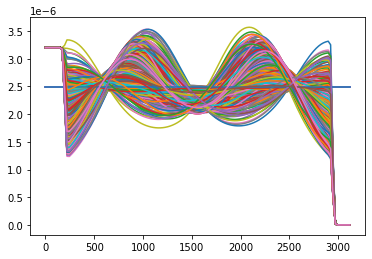

In [19]:
#Visualizing the sld curves
for x in range(787):
  plt.plot(sld_arr[x][0], sld_arr[x][1])
plt.show()

In [21]:
#Normalizing the sld curves by min/max

#First finding the min/max
x_val=sld_arr[:,0,:]
x_min = x_val.min()
x_max = x_val.max()
print('x-range = ', x_min, ' to ',x_max)
y_val=sld_arr[:,1,:]
y_min = y_val.min()
y_max = y_val.max()
print('y-range = ', y_min, ' to ',y_max)

#Normalize
sld_arr[:,0,:] = (sld_arr[:,0,:] - x_min)/(x_max - x_min)
sld_arr[:,1,:] = (sld_arr[:,1,:] - y_min)/(y_max - y_min)

x-range =  0.0  to  3119.78
y-range =  8.28593e-16  to  3.56855e-06


In [22]:
#Checking that the curves are normalized
sld_arr.max(), sld_arr.min()

(1.0, 0.0)

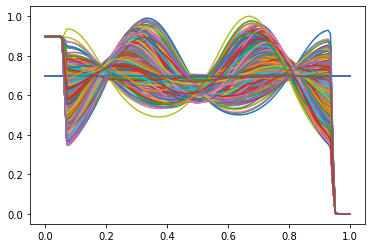

In [23]:
#Reploting the curves
for x in range(786):
  plt.plot(sld_arr[x][0], sld_arr[x][1])
plt.show()

In [24]:
#Creating a numpy array for the params file
temp_params_arr = np.asarray(params_files)
params_arr = temp_params_arr.astype(float)
params_arr.shape

(787, 4)

In [26]:
#Saving the numpy arrays on my google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [27]:
!cd /content/drive/MyDrive/neutron_reflectivity/

In [28]:
np.save('sld_new.npy',sld_arr)
np.save('params_new.npy',params_arr)

In [31]:
!mv sld_new.npy /content/drive/MyDrive/neutron_reflectivity/
!mv params_new.npy /content/drive/MyDrive/neutron_reflectivity/

mv: cannot stat 'sld_new.npy': No such file or directory


In [32]:
!ls /content/drive/MyDrive/neutron_reflectivity/

mlp_test_loader.pth   sld_fp34.npy	   train_latent_var.pt
mlp_train_loader.pth  sld_new.npy	   valid_labels_var.pt
mlp_valid_loader.pth  test_labels_var.pt   valid_latent_var.pt
params_fp34.npy       test_latent_var.pt
params_new.npy	      train_labels_var.pt


In [ ]:
# !cp /content/gdrive/MyDrive/Pytorch-tools-gdrive/neutron_refl_autoencoder.py .